In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
dt = 0.04  # time step
t_max = 20000  # maximum simulation time

In [3]:
# Arrays to store the time
t_values = np.arange(0, t_max, dt)

In [4]:
# Constants
G = 6.67430e-11  # gravitational constant
m = 1.0  # mass of orbiting body
M = 5.972e24  # mass of the central body (Earth)

In [5]:
# Initial parameters for elliptical orbit
r0  = np.array([10e6, 0])  # initial position
v0 = np.array([0, 12500])  # initial velocity

In [6]:
def a(x):
    r = np.linalg.norm(x)
    return -G * M / r**3 * x

In [7]:
# Arrays to store trajectory
x_richardson_values = np.zeros((len(t_values), 2))
v_richardson_values = np.zeros((len(t_values), 2))
E_richardson_values = np.zeros((len(t_values), 2))

In [8]:
# Setting the conditions into arrays
x_richardson_values[0,:] = r0
v_richardson_values[0,:] = v0

In [9]:
# Euler Richardson Numerical integration loop
for i in range(0,len(t_values)-1):
    v_mid = v_richardson_values[i,:]+0.5*a(x_richardson_values[i,:])*dt
    x_mid = x_richardson_values[i,:]+0.5*v_richardson_values[i,:]*dt
    v_richardson_values[i+1,:] = v_richardson_values[i,:]+a(x_mid)*dt
    x_richardson_values[i+1,:] = x_richardson_values[i,:]+v_mid*dt

for i in range(0,len(t_values)):
    E_richardson_values[i]= m*(0.5*(np.linalg.norm(v_richardson_values[i,:]))**2 - G*M/(np.linalg.norm(x_richardson_values[i,:])))

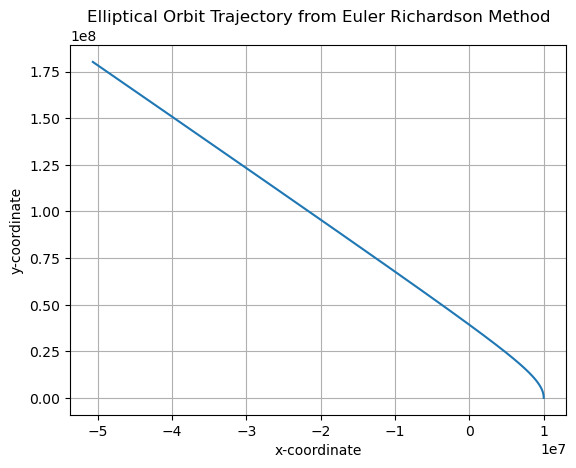

In [10]:
# Plotting the trajectory
plt.plot(x_richardson_values[:, 0], x_richardson_values[:, 1])
plt.title("Elliptical Orbit Trajectory from Euler Richardson Method")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid(True)
plt.show()

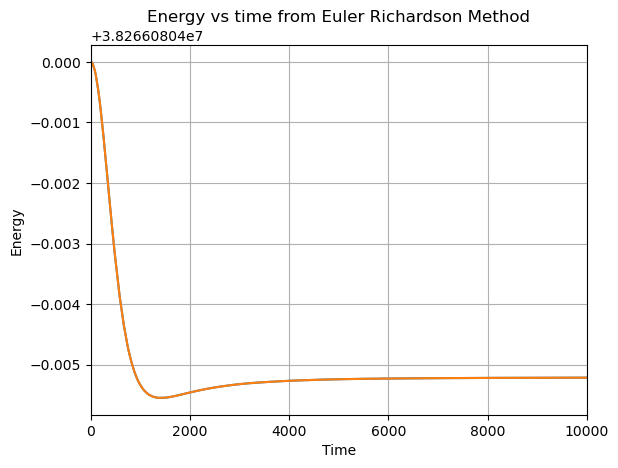

In [11]:
# Plotting the energy
plt.plot(t_values, E_richardson_values[:])
plt.title("Energy vs time from Euler Richardson Method")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.grid(True)
plt.xlim(0, 10000)
plt.show()